In [29]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [6]:
import pandas as pd
import io


In [35]:
import numpy as np
import matplotlib.pyplot as plt



In [30]:
delivery_time = pd.read_csv(io.BytesIO(uploaded['delivery_time.csv']))
print(delivery_time)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [31]:
delivery_time=delivery_time.rename(columns={'Delivery Time': "deliverytime", 'Sorting Time' : "sortingtime"})
delivery_time

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

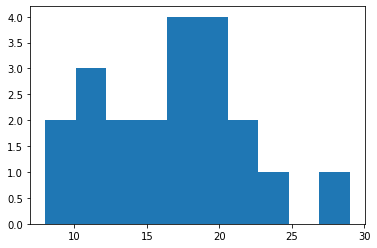

In [32]:
plt.hist(delivery_time.deliverytime)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4177c9b2d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4177d2a3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4177c93710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4177c8ae10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4177c9b150>,
  <matplotlib.lines.Line2D at 0x7f4177c9b350>]}

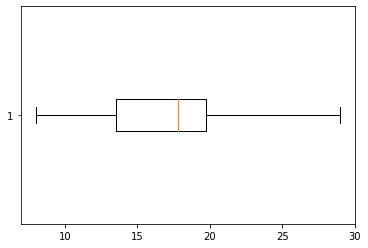

In [33]:
plt.boxplot(delivery_time.deliverytime,0,"rs",0)

Text(0, 0.5, 'deliverytime')

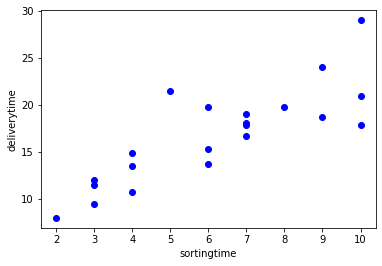

In [38]:
plt.plot(delivery_time.sortingtime,delivery_time.deliverytime,"bo");plt.xlabel("sortingtime");plt.ylabel("deliverytime")

In [39]:
#to find correlation
delivery_time.sortingtime.corr(delivery_time.deliverytime)


0.8259972607955325

In [40]:
np.corrcoef(delivery_time.sortingtime,delivery_time.deliverytime)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [41]:
import statsmodels.formula.api as smf
model=smf.ols("deliverytime~sortingtime",data=delivery_time).fit()
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [42]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        03:16:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred=model.predict(delivery_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [44]:
pred.corr(delivery_time.deliverytime)


0.8259972607955325

Text(0, 0.5, 'deliverytime')

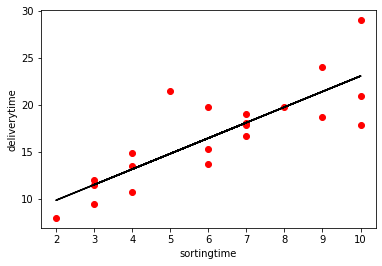

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x=delivery_time['sortingtime'],y=delivery_time['deliverytime'],color='red');plt.plot(delivery_time['sortingtime'],pred,color='black');plt.xlabel("sortingtime");plt.ylabel("deliverytime")

In [46]:
#Transforming variables for accuracy
model1=smf.ols("deliverytime~np.log(sortingtime)", data=delivery_time).fit()
model1
model.params
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        03:23:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
pred1=model1.predict(delivery_time)
pred1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [48]:
pred1.corr(delivery_time.deliverytime)

0.8339325279256244

Text(0, 0.5, 'deliverytime')

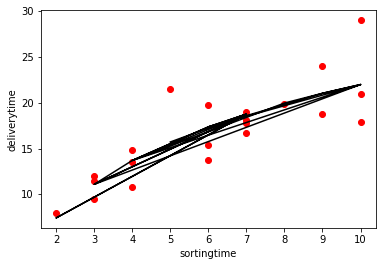

In [49]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=delivery_time['sortingtime'],y=delivery_time['deliverytime'],color='red');plt.plot(delivery_time['sortingtime'],pred1,color='black');plt.xlabel("sortingtime");plt.ylabel("deliverytime")

In [50]:
#Exponential Transformation
model2=smf.ols("np.log(deliverytime)~sortingtime",data=delivery_time).fit()
model2.summary()
pred2=model2.predict(delivery_time)
pred2

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [51]:
pred2.corr(delivery_time.deliverytime)

0.8259972607955328

Text(0, 0.5, 'deliverytime')

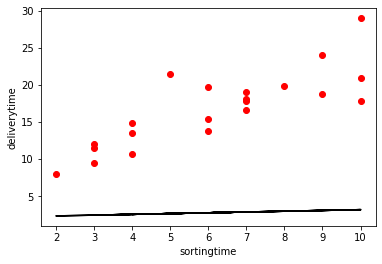

In [52]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=delivery_time["sortingtime"],y=delivery_time["deliverytime"],color='red');plt.plot(delivery_time["sortingtime"],pred2,color='black');plt.xlabel("sortingtime");plt.ylabel("deliverytime")

In [53]:
#Quadratic Transformation
delivery_time["sortingtime_Sq"]=delivery_time.sortingtime*delivery_time.sortingtime
model3=smf.ols('deliverytime~sortingtime_Sq',data=delivery_time).fit()
model3.summary()
pred3=model3.predict(delivery_time)
pred3

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

Text(0, 0.5, 'deliverytime')

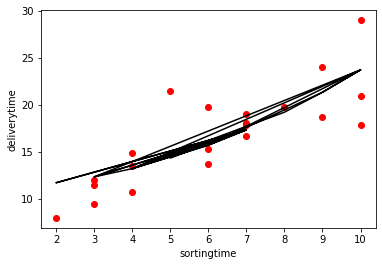

In [54]:
#Data Vizualization
import matplotlib.pyplot as plt
plt.scatter(x=delivery_time["sortingtime"],y=delivery_time["deliverytime"],color='red');plt.plot(delivery_time["sortingtime"],pred3,color='black');plt.xlabel("sortingtime");plt.ylabel("deliverytime")